# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [1]:
import tensorflow as tf
import numpy as np

In [39]:
arr = np.arange(9)  #0 ~ 8: 9

In [40]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체를 생성
dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [41]:
# 각각 원소를 변환 작업을 Dataset 추가. - Dataset.map(변환함수)\
dataset = dataset.map(lambda x:x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [42]:
# dataset = dataset.filter(lambda x : x%2 == 0) #2에 배수만 걸러내기
# def func(x):
#     return x%2 == 0

In [43]:
dataset = dataset.shuffle(9) #값들을 섞는 작업

In [44]:
dataset = dataset.batch(4) #한번에 지정한 개수(3)만큼 제공

In [45]:
for a in dataset:
    print(a)

tf.Tensor([ 1 16 36 25], shape=(4,), dtype=int32)
tf.Tensor([ 0  4 64 49], shape=(4,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [29]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)


In [46]:
x = np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [48]:
ds = tf.data.Dataset.from_tensor_slices((x, y))

In [50]:
for a in ds:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [55]:
ds2 = ds.map(lambda x, y : (x**2, y**3))   #x:2제곱, y: 3제곱
# def map_func(x, y): #dataset에 두개의 배열을 넣었을 경우 변수 두개로 각각 받는다. 
#     return (x**2, y**3)

In [56]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [59]:
ds3 = ds2.shuffle(10)

In [60]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [61]:
ds4 = ds3.batch(4)

In [62]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([14, 15, 16, 17])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18, 19])>)


In [64]:
for a in ds4.repeat(3): #dataset.repeat(count) count횟수만큼 반복. count생략시 무한제공
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([14, 15, 16, 17])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18, 19])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([14, 15, 16, 17])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18, 19])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <

In [84]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y : (x**2, y**3)).shuffle(10).batch(4)#.repeat(3)

In [85]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 1000, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 4913, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2744])>)


In [88]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y : (x**2, y**3)).shuffle(10).batch(4, drop_remainder=True)#.repeat(3)

In [89]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 81, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 6859, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 4096, 1331])>)


# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
#데이터셋 로딩
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
y_train[:5] #회귀(Regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [5]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
# 하이퍼파라미터 값들을 설정
LEARNING_RATE = 0.001 #학습률
N_EPOCHS = 200 #에폭 횟수. 1 epoch 전체 데이터셋을 한번 사용한것.
N_BATCHS = 32  #batch_size. 32개 데이터셋 마다 파라미터들(가중치) 업데이트. 

N_TRAIN = X_train.shape[0] #train set의 개수
N_TEST = X_test.shape[0]  #test set 의 개수
N_FEATURES = X_train.shape[1] #input data의  feature(컬럼) 개수

In [7]:
# Dataset 생성
# drop_remainder=True: 마지막에 batch size보다 제공할 데이터가 적으면 학습시 제공하지 말고 버려라.
# repeat(): 여러 epoch을 돌때마다 계속 데이터를 제공하게 하기 위해.  repeat()를 지정하지 않으면 1 에폭후 데이터를 제공하지 못한다.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [8]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    # 입력 Layer를 따로 정의.
    # 첫번째 Layer를 만들때 input_shape(1개의 입력데이터의 형태)를 지정하면 입력 Layer층이 자동으로 생성된다.
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES,))) 
    model.add(keras.layers.Dense(units=8, activation='relu'))
    # 출력 Layer 
    model.add(keras.layers.Dense(units=1)) #회귀의 출력층: units수는 1, activation 함수는 사용하지 않는다.
    
    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), # optimizer의 하이퍼파라미터를 기본값으로 쓸경우 문자열로 "adam"으로 선언하면됨.
                  loss='mse') #회귀의 Loss 함수: mse
    return model

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 1 step: 한번 가중치를 업데이트. batch size
# 1 epoch: 전체 train 데이터를 한번 학습
steps_per_epoch = N_TRAIN // N_BATCHS  # 학습데이터개수 // 배치수
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [12]:
history = model.fit(train_dataset,  #train dataset (X_train, y_train)
                    epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch, #1에폭당 step 수
                    validation_data=val_dataset, #검증 Dataset 지정.
                    validation_steps=validation_steps)

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 0s 33ms/step - loss: 402.1756 - val_loss: 239.0792
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 151.8999 - val_loss: 120.9074
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 81.3070 - val_loss: 104.4386
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 77.1330 - val_loss: 99.5287
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 73.2870 - val_loss: 102.3875
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 73.6594 - val_loss: 96.8372
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 68.5961 - val_loss: 105.7052
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 68.1735 - val_loss: 96.7148
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 64.4891 - val_loss: 99.6242
Epoch 10/200
12/12 [======================

Epoch 81/200
12/12 [==============================] - 0s 3ms/step - loss: 40.6395 - val_loss: 53.9089
Epoch 82/200
12/12 [==============================] - 0s 3ms/step - loss: 41.8409 - val_loss: 63.6541
Epoch 83/200
12/12 [==============================] - 0s 4ms/step - loss: 41.3783 - val_loss: 53.3382
Epoch 84/200
12/12 [==============================] - 0s 3ms/step - loss: 39.6774 - val_loss: 55.3795
Epoch 85/200
12/12 [==============================] - 0s 3ms/step - loss: 41.2063 - val_loss: 53.4620
Epoch 86/200
12/12 [==============================] - 0s 2ms/step - loss: 40.0407 - val_loss: 50.9151
Epoch 87/200
12/12 [==============================] - 0s 2ms/step - loss: 35.3876 - val_loss: 57.0341
Epoch 88/200
12/12 [==============================] - 0s 2ms/step - loss: 40.0828 - val_loss: 55.3768
Epoch 89/200
12/12 [==============================] - 0s 3ms/step - loss: 41.4325 - val_loss: 53.9549
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 36.9179 

12/12 [==============================] - 0s 3ms/step - loss: 33.3250 - val_loss: 42.3829
Epoch 161/200
12/12 [==============================] - 0s 3ms/step - loss: 33.8451 - val_loss: 43.0780
Epoch 162/200
12/12 [==============================] - 0s 2ms/step - loss: 34.4304 - val_loss: 42.0786
Epoch 163/200
12/12 [==============================] - 0s 2ms/step - loss: 33.9570 - val_loss: 42.5185
Epoch 164/200
12/12 [==============================] - 0s 2ms/step - loss: 35.2657 - val_loss: 42.1647
Epoch 165/200
12/12 [==============================] - 0s 2ms/step - loss: 35.4410 - val_loss: 42.4210
Epoch 166/200
12/12 [==============================] - 0s 2ms/step - loss: 33.9625 - val_loss: 42.6780
Epoch 167/200
12/12 [==============================] - 0s 3ms/step - loss: 34.1748 - val_loss: 43.0065
Epoch 168/200
12/12 [==============================] - 0s 3ms/step - loss: 36.5509 - val_loss: 43.5831
Epoch 169/200
12/12 [==============================] - 0s 3ms/step - loss: 32.7472 - va

In [13]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [14]:
history.history

{'loss': [402.1755714416504,
  151.8999080657959,
  81.30701160430908,
  77.13301118214925,
  73.28703467051189,
  73.65941619873047,
  68.59605550765991,
  68.17346239089966,
  64.48908138275146,
  64.8098824818929,
  65.43766578038533,
  62.97398026784261,
  63.70985635121664,
  65.03363641103108,
  63.968371550242104,
  62.03939040501913,
  62.409614404042564,
  59.52605644861857,
  61.34282080332438,
  58.386757691701256,
  59.823924700419106,
  60.44420623779297,
  57.643933137257896,
  58.558788458506264,
  55.61461035410563,
  55.175479571024574,
  56.72218449910482,
  55.2426438331604,
  56.00656016667684,
  55.081990242004395,
  54.414416472117104,
  53.56959597269694,
  51.94300206502279,
  50.852795441945396,
  52.05717945098877,
  56.36387538909912,
  58.05383268992106,
  55.84691349665324,
  50.77808666229248,
  50.52508211135864,
  50.231220960617065,
  51.10897922515869,
  47.1106162071228,
  46.91719579696655,
  49.16593964894613,
  49.584521770477295,
  49.956803957621

In [15]:
history.history['val_loss']

[239.07921409606934,
 120.90739154815674,
 104.43864727020264,
 99.52873229980469,
 102.38753890991211,
 96.83716106414795,
 105.70520973205566,
 96.71477127075195,
 99.62417411804199,
 94.79558277130127,
 93.51691913604736,
 92.28505611419678,
 90.681396484375,
 90.34867191314697,
 90.38856506347656,
 88.61078262329102,
 93.47032928466797,
 85.18064308166504,
 86.07576370239258,
 86.59419918060303,
 83.04612731933594,
 81.00098419189453,
 86.80790615081787,
 80.00780963897705,
 80.80056667327881,
 86.52716541290283,
 76.9068832397461,
 80.47087955474854,
 76.23849487304688,
 81.33969497680664,
 74.79212665557861,
 79.9434871673584,
 74.42268657684326,
 74.46122074127197,
 72.39503479003906,
 75.09574317932129,
 72.71757221221924,
 85.84942531585693,
 71.20319080352783,
 69.44615173339844,
 71.20471668243408,
 72.69189643859863,
 69.04610443115234,
 68.45055294036865,
 67.5604362487793,
 66.64585781097412,
 67.44141960144043,
 66.82737159729004,
 67.03874111175537,
 64.61459159851074,


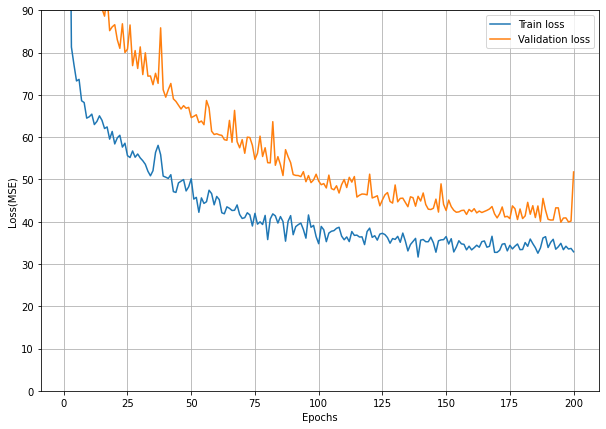

In [16]:
# epoch당 loss와 val_loss  변화에 대해 선그래프 그리기.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 90)
plt.legend()
plt.grid(True)
plt.show()

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']